C:\Users\Diogo\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   312.304413   313.579620   310.954468   312.204773   312.204773   
2010-01-05   312.418976   312.747742   309.609497   310.829926   310.829926   
2010-01-06   311.761444   311.761444   302.047852   302.994293   302.994293   
2010-01-07   303.562164   303.861053   295.218445   295.940735   295.940735   
2010-01-08   294.894653   300.498657   293.455048   299.885956   299.885956   
...                 ...          ...          ...          ...          ...   
2020-05-11  1378.280029  1416.530029  1377.151978  1403.260010  1403.260010   
2020-05-12  1407.119995  1415.000000  1374.770020  1375.739990  1375.739990   
2020-05-13  1377.050049  1385.482056  1328.400024  1349.329956  1349.329956   
2020-05-14  1335.020020  1357.420044  1323.910034  1356.130005

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Diogo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


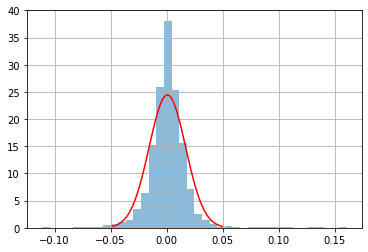

VaR 90% Confidence Level:    -0.020206928674110176
VaR 95% Confidence Level:    -0.026133794319509084
VaR 99% Confidence Level:    -0.03725160858395238


In [1]:
#One-Asset VaR Computation in Python 

#Preparation (every library has to be pre-installed with "pip install *libraryname*")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import yfinance as yf

#Download Google Datas into defined time-period from Yahoo Finance
df = yf.download('GOOG', '2010-01-01','2020-05-18')
print(df)

df = df[['Close']]
print(df)

#Returns computation 
df['returns'] = df.Close.pct_change()
print(df)

mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,norm.pdf(x, mean, std_dev), "r" )
plt.show()

#VaR Computation 
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 90% Confidence Level:   ', VaR_90)
print('VaR 95% Confidence Level:   ', VaR_95)
print('VaR 99% Confidence Level:   ', VaR_99)

In [2]:
#Preparation 
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
quandl.ApiConfig.api_key = '8bbPKo8xjyoors-yMfr-'

#Importing from Quandl API Bank of America Datas (.4 means close prices)
ticker = "WIKI/BAC.4"
df = quandl.get(ticker, start_date="2010-12-31", end_date="2020-05-18", collapse="daily")
percentage = df.pct_change()
percentage = percentage.dropna(how='any') 
    
#Present the datas in ascending order
order_percentage = sorted(percentage["Close"])

#print(order_percentage)

print ("99.99% Actual loss won't exceed: " , "{0:.2f}%".format(np.percentile(order_percentage, .01) * 100))
print ("99% Actual loss won't exceed: " + "{0:.2f}%".format(np.percentile(order_percentage, 1) * 100))
print ("95% Actual loss won't exceed: " + "{0:.2f}%".format(np.percentile(order_percentage, 5) * 100))
print ("Losses expected to exceed " + "{0:.2f}%".format(np.percentile(order_percentage, 5) * 100) + " " + str(.05*len(percentage)) + " out of " + str(len(percentage)) + " days")
varg = np.percentile(order_percentage, 5)

99.99% Actual loss won't exceed:  -18.61%
99% Actual loss won't exceed: -5.90%
95% Actual loss won't exceed: -3.13%
Losses expected to exceed -3.13% 90.95 out of 1819 days


In [3]:
#Extending the Dataset to 5 different assets, combining them into a Portfolio with alternative exposures.
tickers = ["WIKI/BAC.4", "WIKI/AAPL.4", "WIKI/NKE.4", "WIKI/NFLX.4", "WIKI/AMZN.4"]
exposures = [1000000, 400000, 3000000, 200000, 10000000]
df = quandl.get(tickers, start_date="2010-12-31", end_date="2020-05-18", collapse="daily")


#Returns computation
percentage = df.pct_change()

#Different Dollar Exposures into Portfolio
value_ptf = percentage * exposures
value_ptf['Value of Portfolio'] = value_ptf.sum(axis=1)

print(value_ptf)

ptf_percentage = value_ptf['Value of Portfolio']
ptf_percentage = ptf_percentage.sort_values(axis=0, ascending=True)

VaR =  np.percentile(ptf_percentage, .01)
VaR1 =  np.percentile(ptf_percentage, 1)
VaR2 =  np.percentile(ptf_percentage, 5)

print ("99.99% Actual loss won't exceedd: " + str(round(VaR, 2)))
print ("99% Actual loss won't exceed: " + str(round(VaR1, 2)))
print ("95% Actual loss won't exceed: " + str(round(VaR2, 2))) 
print ("Losses expected to exceed " + "{0:.2f}".format(VaR2) + " " + str(.05*len(ptf_percentage)) + " out of " + str(len(ptf_percentage)) + " days")
percentage = percentage[1:]

            WIKI/BAC - Close  WIKI/AAPL - Close  WIKI/NKE - Close  \
Date                                                                
2010-12-31               NaN                NaN               NaN   
2011-01-03      63718.140930        8692.956349      23530.789042   
2011-01-04       3523.608175        2087.568650     -73876.176095   
2011-01-05      18258.426966        3272.057714      19649.874955   
2011-01-06      -4137.931034        -323.353293     -26975.863701   
...                      ...                ...               ...   
2018-03-21      -3439.649781       -9061.858023     -20209.580838   
2018-03-22     -41418.261688       -5663.572138     -87264.506405   
2018-03-23     -45171.849427       -9251.088276       9779.571562   
2018-03-26      43537.881385       18988.723172      58950.951570   
2018-03-27     -30223.390276      -10256.410256      12291.350531   

            WIKI/NFLX - Close  WIKI/AMZN - Close  Value of Portfolio  
Date                           